In [1]:
#https://beingdatum.com/data-preprocessing/#:~:text=Data%20Preprocessing%20with%20Python%20Data%20preprocessing%20involves%20the,directly%20affect%20the%20outcomes%20of%20any%20analytic%20algorithm.
#Data preprocessing involves the transformation of the raw dataset into an understandable format

**Steps In Data Preprocessing:**

Gathering the data

Import the dataset & Libraries

Dealing with Missing Values

Divide the dataset into Dependent & Independent variable

dealing with Categorical values

Split the dataset into training and test set

Feature Scaling

In [2]:
#datasets
#https://www.kaggle.com/shaktisharma/part-1-data-preprocessing?select=Data.csv (includes python solutions)
#for practice
#https://www.kaggle.com/rishabhsingh98/social-network-ads

In [3]:
import numpy as np
import pandas as pd

In [4]:
#setup google drive
from google.colab import drive

In [5]:
#mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#locate file in google drive (uploaded it separately)
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pre-data.csv')

In [8]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [9]:
#dealing with missing values
#Sometimes we may find some data are missing in the dataset. 
#if we found then we will remove those rows or we can calculate either mean, mode or median of the feature and replace it with missing values. 
#This is an approximation which can add variance to the dataset.

#check for null values
#With the help of info() we can found total number of entries as well as count of non-null values with datatype of all features.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [10]:
#we also can use dataset.isna() to see the of null values in our dataset.
dataset.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [11]:
#for large datasets
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [12]:
#As we can see ‘Age’ and ‘Salary’ containing null values.

#drop null values
#Pandas provide a dropna() function that can be used to drop either row or columns with missing data. 
#We can use dropna() to remove all the rows with missing data.
dataset_1 = dataset.dropna()

In [13]:
dataset_1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
#Replacing Null values with Strategy:
#For replacing null values we use the strategy that can be applied on a feature which has numeric data. 
#We can calculate the Mean, Median or Mode of the feature and replace it with the missing values.
dataset.fillna(dataset.mean(),inplace=True)

In [17]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [15]:
#In the above line of code, it will affect the entire data-set and replaces every variable null values with their respective mean, and ‘inplace =True’ indicates to affect the changes to dataset.
#If we need to replace particular variable with the strategies then we can use above line of code.
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
dataset['Salary'].fillna(dataset['Salary'].mean(),inplace=True)

In [16]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [18]:
#Divide the dataset into Dependent & Independent variable
#Basically dataset might be labeled or unlabeled, here i am considering labeled dataset for a machine learning classification problem and considering a small dataset for better understanding, in our dataset there is four columns Country, Age, Salary and Purchased, Actually It is a dataset of a shopping complex those handle the customer data who purchased that product or not.

#In our dataset there is three independent variables (Country, Age and Salary) and one dependent variable (Purchased) that we have to predict.
#To read the columns, we will use iloc of pandas (used to fix the indexes for selection) which takes two parameters — [row selection, column selection]
X = dataset.iloc[:,[0,1,2]]   #or X=dataset.iloc[:,:-1]
Y = dataset.iloc[:,[3]]       #or Y=dataset.iloc[:,-1:]

In [20]:
#1. Create set X_1 of Country column from the dataset
X_1 = dataset.iloc[:,[0]]
X_1

,Country
0,France
1,Spain
2,Germany
3,Spain
4,Germany
5,France
6,Spain
7,France
8,Germany
9,France


In [21]:
#2. Create set X_2 of Age and Salary columns from the dataset
X_2 = dataset.iloc[:,[1,2]]
X_2


,Age,Salary
0,44.000000,72000.000000
1,27.000000,48000.000000
2,30.000000,54000.000000
3,38.000000,61000.000000
4,40.000000,63777.777778
5,35.000000,58000.000000
6,38.777778,52000.000000
7,48.000000,79000.000000
8,50.000000,83000.000000
9,37.000000,67000.000000


In [22]:
#3. Create set X_3 of first five records in the dataset
X_3 = dataset.iloc[0:5,:]
X_3


,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


In [23]:
#Note:  : selects all, using [] helps you select multiple columns or rows, this is how to slice the dataset.

In [24]:
#Dealing with Categorical values
#in our dataset there is one categorical variable ‘Country’. 
#Now it gets complicated for machines to understand texts and process them, rather than numbers, since the models are based on mathematical equations and calculations. 
#Therefore, we have to encode the categorical data.

In [25]:
#The library that we are going to use for the task is called Scikit Learn.preprocessing. 
#There’s a class in the library called LabelEncoder which we will use for the encoding
from sklearn.preprocessing import LabelEncoder

In [26]:
#The name of the classes are
#1:Datasets-load the standard dataset for further use
#2:Linearmodel-allows to use linear model such as logistic regression
#3:Model_selection-facilitates cross validation
#4:Pipeline-to assemble several steps that can be cross-validated together while setting different parameters
#5:Preprocessing-provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [27]:
#The next step is usually to create an object of that class. We will call our object lEncoder.
lEncoder = LabelEncoder()

In [28]:
#As you can see the first column contains data in text form. We can observe that there are 3 categories, France, Spain & Germany. 
#Now to convert this into numerical we can use following code:
X.iloc[:,0] = lEncoder.fit_transform(X.iloc[:,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [29]:
X

,Country,Age,Salary
0,0,44.000000,72000.000000
1,2,27.000000,48000.000000
2,1,30.000000,54000.000000
3,2,38.000000,61000.000000
4,1,40.000000,63777.777778
5,0,35.000000,58000.000000
6,2,38.777778,52000.000000
7,0,48.000000,79000.000000
8,1,50.000000,83000.000000
9,0,37.000000,67000.000000


In [30]:
#0 : France
#1 : Germany
#2 : Spain
#The problem is still the same. 
#since 1 is greater than 0 and 2 is greater than 1 the equations in the model will think that Spain has a higher value than Germany and France and Germany has a higher value than France. 
#But, these are actually three categories and there is no relational order between them.
#So , we have to prevent this, we’re going to use Dummy Variables.

**Dummy Variables**

Dummy Variables” is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

Number of Columns = Types of Categories

In [31]:
#In our case we have 3 types, so we are going to have 3 columns. To do this we will import yet another library called OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Next step is to create an object of that class with an important parameter called categorical_features which takes a value of the index of the column.
Onehotencoder = OneHotEncoder()
Onehotencoder = OneHotEncoder(['Country'])  #one way of encoding

In [33]:
#Since the latest build of sklearn library removed categorical_features parameter for onehotencoder class. 
#It is advised to use ColumnTransformer class for categorical datasets. 
from sklearn.compose import ColumnTransformer

In [34]:
#takes a value of the index of the column
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],   remainder='passthrough')

In [35]:
#X = columnTransformer.fit_transform(X).toarray()
X=np.array(columnTransformer.fit_transform(X),dtype=np.float)

In [36]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [37]:
#Now we got our independent variable X in the form of numpy array. 
#same can we check with the help of type(X). 
#just for to showing you how X look like we will converted into Pandas Dataframe with the use of below code.

In [38]:
pd.DataFrame(X,dtype=int)

,0,1,2,3,4
0,1,0,0,44,72000
1,0,0,1,27,48000
2,0,1,0,30,54000
3,0,0,1,38,61000
4,0,1,0,40,63777
5,1,0,0,35,58000
6,0,0,1,38,52000
7,1,0,0,48,79000
8,0,1,0,50,83000
9,1,0,0,37,67000


In [39]:
#There is three variables corresponding to the categories. In above code we converted all float values to integers by using dtype

In [40]:
#Now will doing the Label Encoding with dependent variable (Y)
labelEncoder_Y = LabelEncoder()
Y.iloc[:,0] = labelEncoder_Y.fit_transform(Y.iloc[:,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [41]:
Y

,Purchased
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


In [42]:
#Now we got X and Y both are in encoded form, now both can be apply on Machine Learning model.

**Split the dataset into training and test set**

In machine learning we usually splits the data into Training and Testing data for applying models.

Generally we split the dataset into 70:30 or 80:20 (as per the requirement)it means, 70 percent data taken to train and 30 percent data taken to test.


For this task, we will import train_test_split from model_selection library of scikit.

In [43]:
from sklearn.model_selection import train_test_split

Now to build our training and test sets, we will create 4 sets — 

  X_train (training part of the features), 

  X_test (test part of the features), 

  Y_train (training part of the dependent variables associated with the X train sets, and therefore also the same indices) , 

  Y_test (test part of the dependent variables associated with the X test sets, and therefore also the same indices). 
  
We will assign to them the train_test_split, which takes the parameters — arrays (X and Y), 
test_size (An ideal choice is to allocate 20% of the dataset to test set, it is usually assigned as 0.2. 0.25 would mean 25%)

In [44]:
#splitting X and Y dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [45]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04]])

In [46]:
X_test

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04]])

In [47]:
Y_train

,Purchased
9,1
1,1
6,0
7,1
3,0
0,0
5,1


In [48]:
Y_test

,Purchased
2,0
8,0
4,1


**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 

Why Scaling :- Most of the times, your dataset will contain features highly varying in magnitudes, units and range. 
But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

So many Machine Learning Algorithms must have Feature Scaling process like Regression,logistic regression, SVMs, k-means (see k-nearest neighbors), PCA, neural network etc.

**Standardization**

This is one of the most use type of scalar in data preprocessing.

This is known as z-score . This re distribute the data in such a way that mean (μ) = 0 and standard deviation (σ) =1

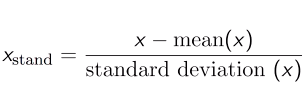

In [49]:
#We will apply the formula of standardization and fit it to a scale. 
#For this, we will import the class StandardScaler from the sckit preprocessing library and as usual create an object of that class.
from sklearn.preprocessing import StandardScaler

In [50]:
sc_x = StandardScaler()

In [51]:
#Now We will transform all the data (X_train and X_test) to a same standardized scale.
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [52]:
X_train

array([[ 0.8660254 ,  0.        , -0.8660254 , -0.2029809 ,  0.44897083],
       [-1.15470054,  0.        ,  1.15470054, -1.82168936, -1.41706417],
       [-1.15470054,  0.        ,  1.15470054,  0.08478949, -1.0242147 ],
       [ 0.8660254 ,  0.        , -0.8660254 ,  1.5775984 ,  1.62751925],
       [-1.15470054,  0.        ,  1.15470054, -0.04111006, -0.14030338],
       [ 0.8660254 ,  0.        , -0.8660254 ,  0.93011502,  0.94003267],
       [ 0.8660254 ,  0.        , -0.8660254 , -0.52672259, -0.43494049]])

In [53]:
X_test

array([[ 0.        ,  0.        ,  0.        , -1.22474487, -1.07298811],
       [ 0.        ,  0.        ,  0.        ,  1.22474487,  1.33431759],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26132948]])

Do we need to apply feature scaling to dependent variable (Y))?

Ans: As we can see that dependent variable is categorical as it having only two value 0 and 1, and it is a classification problem so in that case we will not going to scaling this vector. But if we will talk about for regression problem then we will do scaling with dependent variable as well.

In [ ]:
#Task: Use min max scaling for feature scaling

In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [55]:
min_max_scaler = preprocessing.MinMaxScaler()

In [57]:
X_train_minmax = min_max_scaler.fit_transform(X_train)


In [59]:
X_train_minmax

array([[1.        , 0.        , 0.        , 0.47619048, 0.61290323],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.56084656, 0.12903226],
       [1.        , 0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        , 0.52380952, 0.41935484],
       [1.        , 0.        , 0.        , 0.80952381, 0.77419355],
       [1.        , 0.        , 0.        , 0.38095238, 0.32258065]])

In [58]:
X_test_minmax=min_max_scaler.fit_transform(X_test)


In [60]:
X_test_minmax

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.33716475]])